# Polynomial Regression: Atmospheric CO2 Data Set
First, import all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Next, input the data set.

In [2]:
x = np.arange(1959.0,2020.0).reshape(-1,1)
y = np.array([315.98, 316.91, 317.64, 318.45, 318.99, 319.62, 320.04, 321.37, 
              322.18, 323.05, 324.62, 325.68, 326.32, 327.46, 329.68, 330.18, 
              331.12, 332.04, 333.83, 335.4, 336.84, 338.75, 340.11, 341.45,
              343.05, 344.66, 346.12, 347.43, 349.18, 351.57, 353.12, 354.39, 
              355.61, 356.45, 357.1, 358.83, 360.82, 362.61, 363.73, 366.7, 
              368.38, 369.55, 371.14, 373.28, 375.8, 377.52, 379.8, 381.9, 
              383.79, 385.59, 387.43, 389.9, 391.65, 393.86, 396.52, 398.64, 
              400.83, 404.22, 406.55, 408.52, 411.43]).reshape(-1,1)
print(np.hstack((x,y)))

[[1959.    315.98]
 [1960.    316.91]
 [1961.    317.64]
 [1962.    318.45]
 [1963.    318.99]
 [1964.    319.62]
 [1965.    320.04]
 [1966.    321.37]
 [1967.    322.18]
 [1968.    323.05]
 [1969.    324.62]
 [1970.    325.68]
 [1971.    326.32]
 [1972.    327.46]
 [1973.    329.68]
 [1974.    330.18]
 [1975.    331.12]
 [1976.    332.04]
 [1977.    333.83]
 [1978.    335.4 ]
 [1979.    336.84]
 [1980.    338.75]
 [1981.    340.11]
 [1982.    341.45]
 [1983.    343.05]
 [1984.    344.66]
 [1985.    346.12]
 [1986.    347.43]
 [1987.    349.18]
 [1988.    351.57]
 [1989.    353.12]
 [1990.    354.39]
 [1991.    355.61]
 [1992.    356.45]
 [1993.    357.1 ]
 [1994.    358.83]
 [1995.    360.82]
 [1996.    362.61]
 [1997.    363.73]
 [1998.    366.7 ]
 [1999.    368.38]
 [2000.    369.55]
 [2001.    371.14]
 [2002.    373.28]
 [2003.    375.8 ]
 [2004.    377.52]
 [2005.    379.8 ]
 [2006.    381.9 ]
 [2007.    383.79]
 [2008.    385.59]
 [2009.    387.43]
 [2010.    389.9 ]
 [2011.    3

Next, define the basis functions (cubic polynomial) and perform regression.

In [3]:
def basisfunc(x):
    f1 = np.ones(x.shape)
    f2 = x
    f3 = x**2
    f4 = x**3
    x2 = np.hstack((f1,f2,f3,f4))
    return x2

x2 = basisfunc(x)
model = LinearRegression().fit(x2, y)
print("Coefficients: \n", model.intercept_,model.coef_)
r_sq = model.score(x2, y)
print(f"R^2: {r_sq}")
ypred = model.predict(x2)
MSE = ((y - ypred)**2).sum()
print(f"MSE: {MSE}")
NMSE = MSE/((y - y.mean())**2).sum()
print(f"NMSE: {NMSE}")

Coefficients: 
 [-203463.40067082] [[ 0.00000000e+00  3.29685734e+02 -1.77738069e-01  3.19267950e-05]]
R^2: 0.9994055246118122
MSE: 28.545723972152413
NMSE: 0.0005944753881877512


Finally, plot your results.

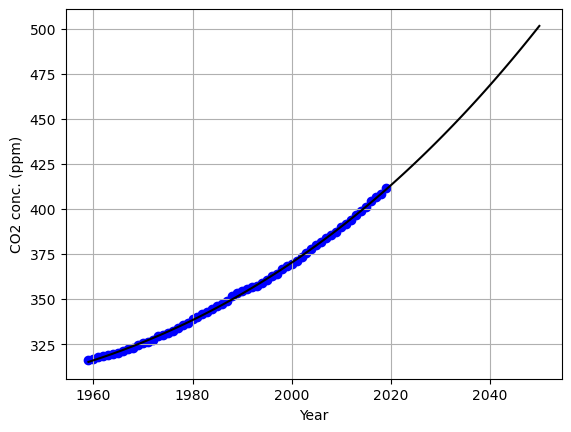

In [4]:
xfine = np.linspace(x[0],2050,100).reshape(-1,1)
x2 = basisfunc(xfine)
y2 = model.predict(x2)
plt.plot(xfine, y2,color='k')
plt.scatter(x, y, color='b')
plt.xlabel('Year')
plt.ylabel('CO2 conc. (ppm)')
plt.grid()
plt.show()